# Time Series + Fuzzy logic

In [1]:
import pandas 
import statsmodels 
import matplotlib

In [ ]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

# Ensure the data has a datetime index and a single time series column
data['Date'] = pd.to_datetime(data['Date'])  # Assuming a 'Date' column
data.set_index('Date', inplace=True)

# Preview the data
print(data.head()) 

            Open  High  Low  Close  Volume Currency
Date                                               
2010-07-18   0.0   0.1  0.1    0.1      75      USD
2010-07-19   0.1   0.1  0.1    0.1     574      USD
2010-07-20   0.1   0.1  0.1    0.1     262      USD
2010-07-21   0.1   0.1  0.1    0.1     575      USD
2010-07-22   0.1   0.1  0.1    0.1    2160      USD


### Visualization

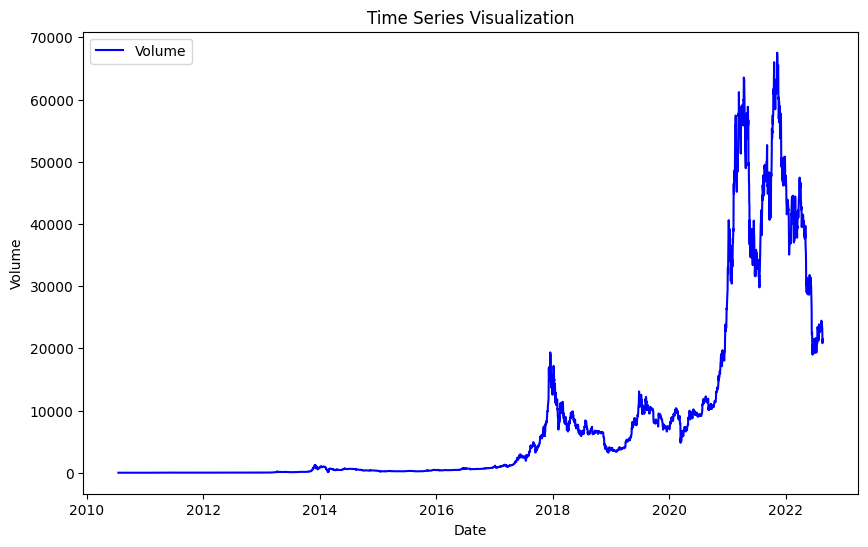

In [3]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Open'], label='Volume', color='blue')
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Open'])  # Replace 'Value' with your time series column name
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("Time series is not stationary.")
else:
    print("Time series is stationary.")

ADF Statistic: -1.744515420043839
p-value: 0.4083349216943971
Time series is not stationary.


In [5]:
print(data[:0])

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Currency]
Index: []


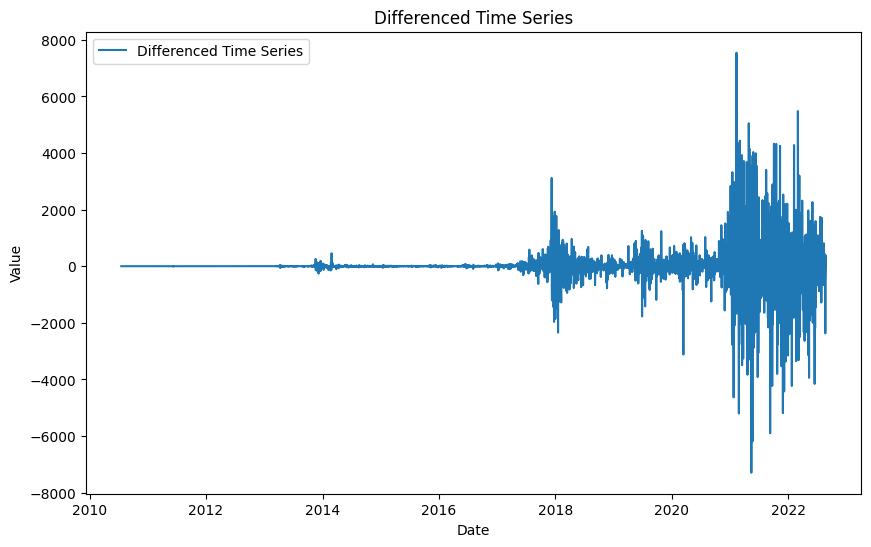

In [6]:
data['Open'] = data['Open'].astype(int)
data['High'] = data['High'].astype(int)
data['Low'] = data['Low'].astype(int)
data['Close'] = data['Close'].astype(int)
data['Volume'] = data['Volume'].astype(int)

# Before running, uncomment this line and run it once:
data = data.drop('Currency', axis=1)

# data = data[0:]

data_diff = data.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(data_diff['Open'], label='Differenced Time Series')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

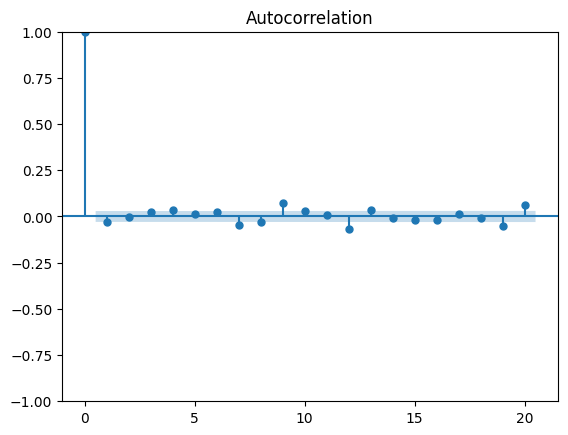

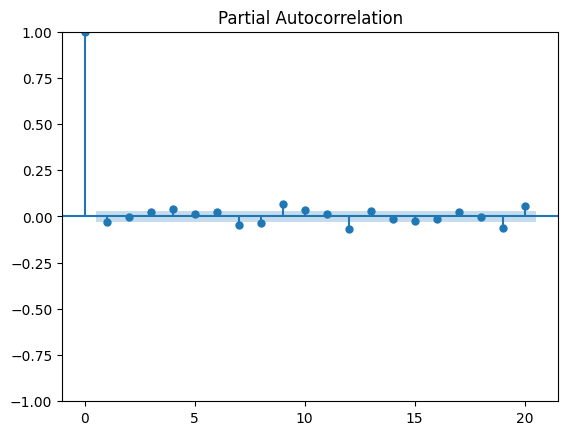

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plot_acf(data_diff['Open'], lags=20)
plt.show()

# PACF plot
plot_pacf(data_diff['Open'], lags=20)
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(data['Open'], order=(2, 1, 2))  # Replace (p, d, q) with identified values
result = model.fit()

# Model summary
print(result.summary())

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 4420
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -34900.417
Date:                Sun, 06 Apr 2025   AIC                          69810.834
Time:                        15:43:07   BIC                          69842.802
Sample:                    07-18-2010   HQIC                         69822.108
                         - 08-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8155      0.009     95.223      0.000       0.799       0.832
ar.L2         -0.9282      0.007   -126.884      0.000      -0.943      -0.914
ma.L1         -0.8537      0.008   -104.403      0.0

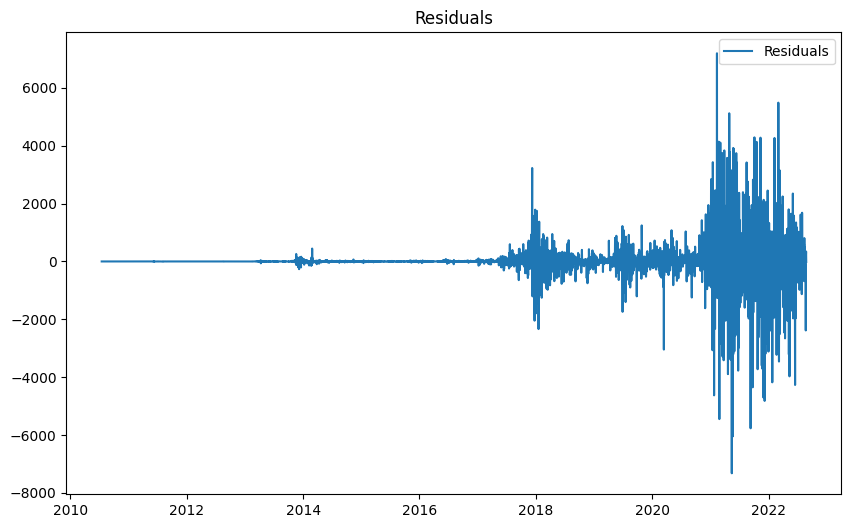

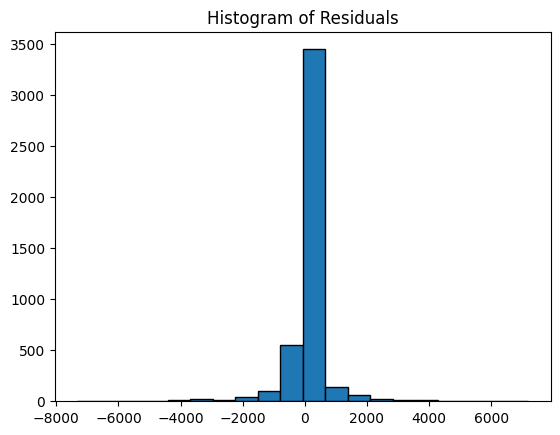

In [9]:
# Plot residuals
residuals = result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals')
plt.legend()
plt.show()

# Plot histogram of residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histogram of Residuals')
plt.show()

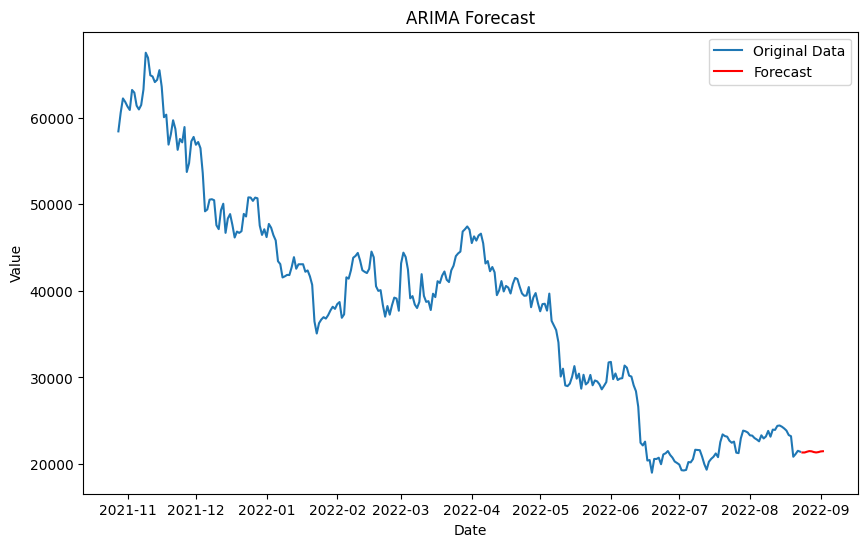

In [10]:
# Forecast the next 10 steps
forecast = result.forecast(steps=10)


# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data[-300:]['Open'], label='Original Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Next time:
- take interval 3 months, make predictions from 2 months for the third month
- fuzzy logic how to apply
- read more on ARIMA and other models

## Exponential Smoothing

$F_{t+1} = α * Y_t + (1 — α) * F_t$

alpha 0.5
10 -> 10
15 -> 0.5\*10 + 15\*0.5 = 12.5
25 
20
15
5


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


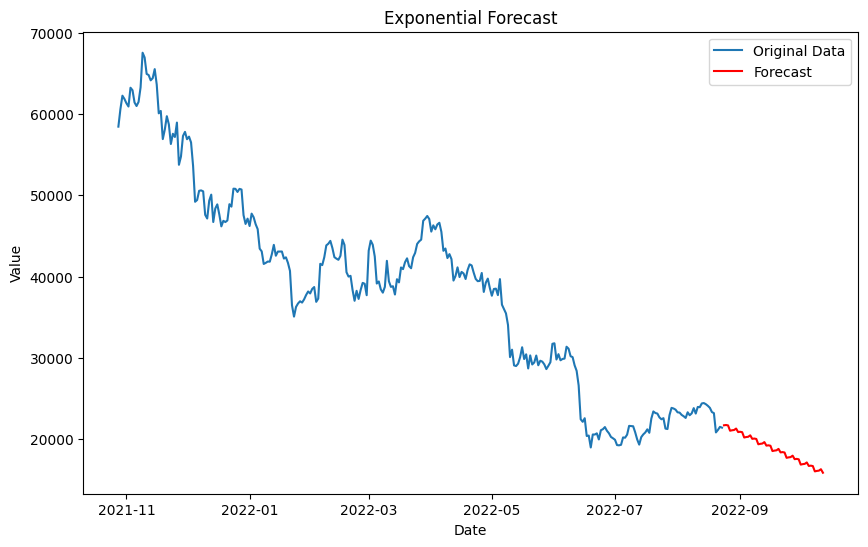

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

# Ensure the data has a datetime index and a single time series column
data['Date'] = pd.to_datetime(data['Date'])  # Assuming a 'Date' column
data.set_index('Date', inplace=True)

# Apply Holt-Winters Exponential Smoothing (trend + seasonality)
model = ExponentialSmoothing(data['Open'], trend='add', seasonal='add', seasonal_periods=7)
fit = model.fit(smoothing_level=0.2, smoothing_trend=0.1, smoothing_seasonal=0.3, optimized=False)

# Forecast for next 50 days
forecast = fit.forecast(steps=50)


# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data[-300:]['Open'], label='Original Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Exponential Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print(len(data))

4420


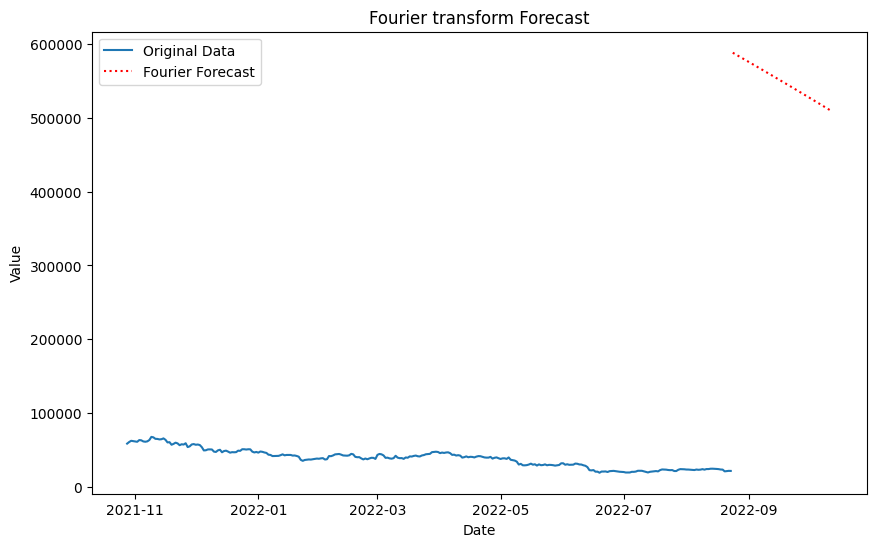

In [12]:
# DOES NOT WORK

from scipy.fftpack import fft, ifft, fftfreq
import numpy as np

# df = pd.DataFrame({'Time': t, 'Value': y})


# 🔹 Step 2: Apply Fast Fourier Transform (FFT)
fft_result = fft(np.array(data['Open']))  # Compute FFT
frequencies = fftfreq(len(data))  # Compute frequency bins


magnitude = np.abs(fft_result)  # Magnitude spectrum
top_k = 5  # Select top 5 most dominant frequencies
indices = np.argsort(magnitude)[-top_k:]  # Get indices of top frequencies

# 🔹 Step 4: Reconstruct Time Series Using Top Frequencies
filtered_fft = np.zeros_like(fft_result)
filtered_fft[indices] = fft_result[indices]  # Keep only dominant frequencies

reconstructed_signal = ifft(filtered_fft).real  # Inverse FFT to reconstruct signal

# 🔹 Step 5: Forecast Future Points
future_t = np.arange(len(data), len(data) + 50)  # 50 steps into the future
future_signal = np.zeros_like(future_t, dtype=np.float64)
for i in indices:
    amp = np.abs(fft_result[i]) / 50  # Fix: Normalize amplitude
    phase = np.angle(fft_result[i])  # Fix: Include phase shift
    freq = frequencies[i]

    if freq > 0:  # Use only positive frequencies
        future_signal += amp * np.cos(2 * np.pi * freq * future_t + phase)

future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=50, freq='D')

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data[-300:]['Open'], label='Original Data')
# plt.plot(future_signal, label='Forecast', color='red')
plt.plot(future_dates, future_signal, label="Fourier Forecast", linestyle="dotted", color='red')
plt.title('Fourier transform Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

n: 4420


<StemContainer object of 3 artists>

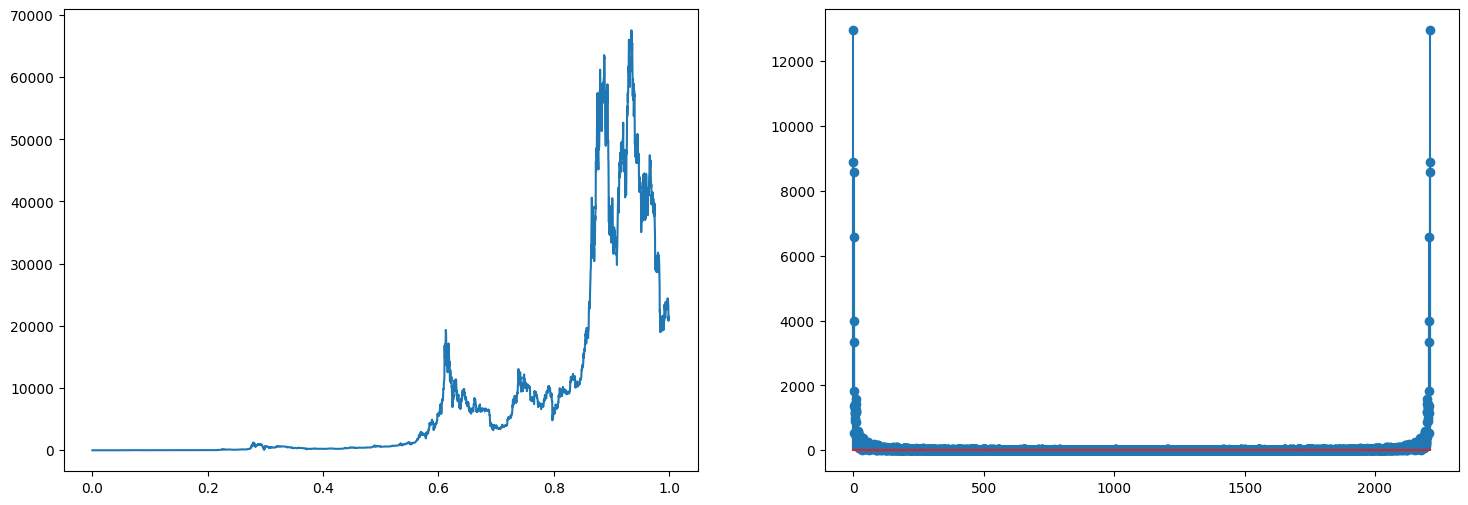

In [13]:
from scipy import fftpack
import numpy as np

# Frequency and sampling rate
f = 10 # frequency
Fs = len(data['Open']) # sampling rate
t = np.arange(0,1,1/Fs)

y = np.array(data['Open'])
y_fft = fftpack.fft(y)

# Plot data
n = np.size(t)
print("n:",n)
fr = Fs/2 * np.linspace(0,1, int(n/1))
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax[0].plot(t, y)    # plot time series

#ax[1].stem(fr, y_m) # plot freq domain -- remove 0 to see the detail
ax[1].stem(fr[1:], y_m[1:]) # plot freq domain -- remove 0 to see the detail

In [14]:

fr_3 = fr[0:3]
y_m_3 = y_m[0:3]
print("fr:", fr_3)
print("y_m:", y_m_3)

fr: [0.         0.50011315 1.0002263 ]
y_m: [16604.44371041 12952.98609913  8905.0767899 ]


n: 4420
len of matchedf: 2009 [36695820.59999999       -0.j         20670937.30227209+19803179.31496334j
  8741726.64156514+17632165.57850472j  2842316.18930989+18763651.34026362j
 -6302313.59234523+13076659.23496862j -6008589.80010385 +6417929.50181364j
 -6267250.99918504 +3916611.62645824j -3801113.46049761 -1446624.69681694j
  1177159.92904424  +278935.22765797j  -131018.44113428 +2989839.70735073j]


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


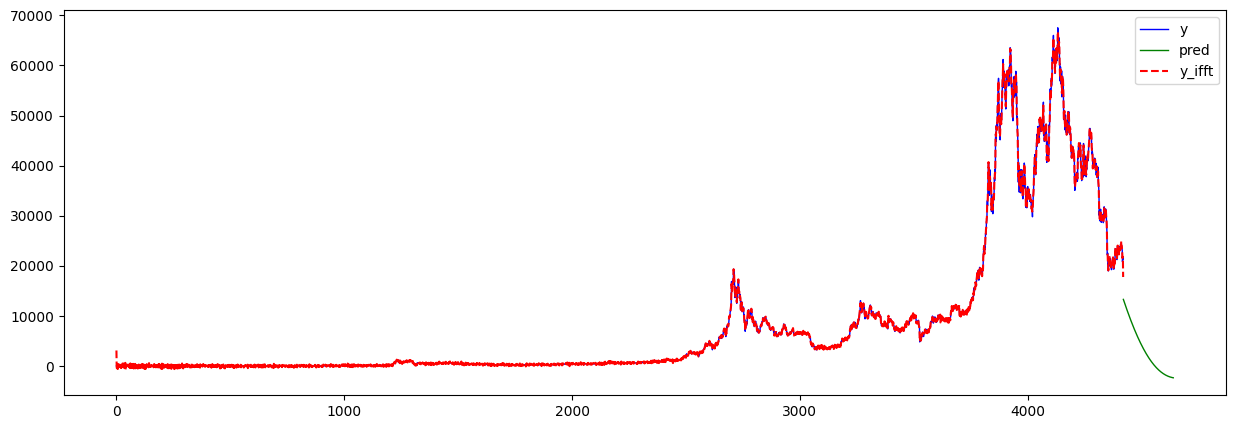

In [15]:
# Inverse FFT from freq domain to original time domain
from scipy import fftpack
from numpy import fft
#print("len y_fft:", type(y_fft), len(y_fft), (y_fft[0:10]))

t = np.arange(0, len(data['Open']))

#y_fft_cut = y_fft[0:99] #filter out a freq to see if it close match 
# try zero low amp freq (noise) -- didn't look just noise, no clear trend
treshold_amp = 16
y_fft_cut = np.zeros(y_fft.size, dtype=np.complex_)

n = np.size(t)
print("n:",n)
fr = Fs/2 * np.linspace(0,1, int(n/1))

matchedf = 0
y_m = 2/n * abs(y_fft[0:np.size(fr)])
for i, f in enumerate(y_fft):
  
  if y_m[i] > treshold_amp: 
    y_fft_cut[i] = f
    matchedf += 1
print("len of matchedf:", matchedf, y_fft_cut[0:10])

inv = fftpack.ifft(y_fft_cut, n=len(y))

# calculate the new data points from the FFT result
n_harm = 8
x_freqdom = y_fft_cut #y_fft
n=len(y)
predsize2=220
f = fft.fftfreq(n)              # frequencies
indexes = list(range(n))
# sort indexes by frequency, lower -> higher
indexes.sort(key=lambda i: np.absolute(f[i]))

t2 = np.arange(0, predsize2)
res2 = np.zeros(t2.size)
for i in indexes[:1 + n_harm * 2]:
    ampli = np.absolute(x_freqdom[i]) / n   # amplitude
    phase = np.angle(x_freqdom[i])          # phase
    res2 += ampli * np.cos(2 * np.pi * f[i] * t2 + phase) 

plt.subplots(figsize=(15,5))
plt.plot(t, y, 'b', label = 'y', linewidth = 1)

plt.plot(np.arange(n, n + predsize2), res2, 'g', label = 'pred', linewidth = 1)

plt.plot(np.arange(0, inv.size), inv, 'r', label = 'y_ifft', linestyle="--")    # plot time series
plt.legend()
plt.show()

### todo:
- read about fft
- make predictions based only last 100 days : 50 days ahead
- apply fuzzy logic : in parameters selection for example, or in harmonics
- make predictions for some existing range and compare: validation

**Validation**

*Середньоквадратична помилка прогнозу:*
$$\sigma_{err} = \sqrt{\frac{1}{N} \sum_{t=1}^{N}(y^{*}(t) - y(t))^{2}}$$

*Нормалізована середньоквадратична помикла:*
$$\sigma_{norm} = \sqrt{\frac{\sum_{t=1}^{N}(y^{*}(t) - y(t))^{2}}{ \sum_{t=1}^{N}(E(t) - y(t))^{2} }}$$

де $E(t)$ --- мат. сподівання показника $y(t)$

*Нейронки*:   -> l1 (5$\dot$k: 10, 15, 20 neurons; 7$\dot$k) -> l2 (15 neurons) -> l3 (output 1) ->

## Predict k days based on previous n days via fft + validation via metrics

n: 20


<StemContainer object of 3 artists>

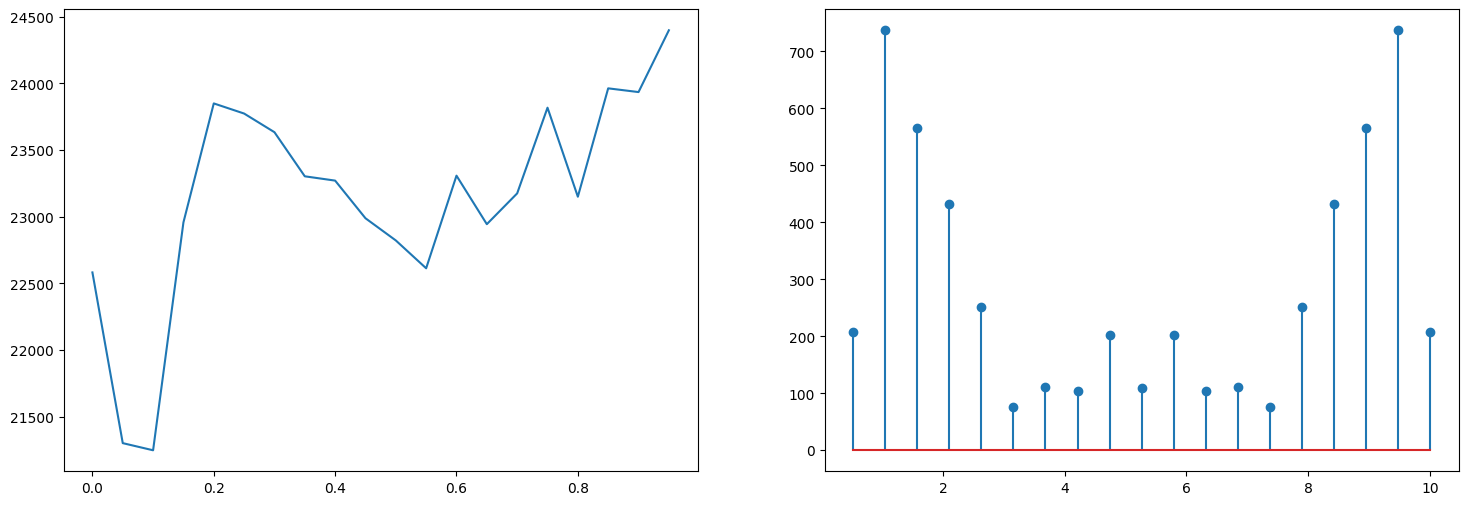

In [16]:
from scipy import fftpack
import numpy as np
import pandas as pd

data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

take_days = 20
predict_days = 10

# Frequency and sampling rate

f = 10 # frequency


Fs = take_days # sampling rate
t = np.arange(0,1,1/Fs)

y = np.array(data['Open'])
data_last_points = y[len(y) - take_days - predict_days: len(y) - predict_days: 1]
expected = y[len(y) - predict_days: len(y): 1]
all_data = np.concatenate((data_last_points, expected))
y_fft = fftpack.fft(data_last_points)

# Plot data

print("n:",take_days)
fr = Fs/2 * np.linspace(0,1, int(take_days/1))
y_m = 2/take_days * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax[0].plot(t, data_last_points)    # plot time series

#ax[1].stem(fr, y_m) # plot freq domain -- remove 0 to see the detail
ax[1].stem(fr[1:], y_m[1:]) # plot freq domain -- remove 0 to see the detail



fr: [0.         0.52631579 1.05263158]
y_m: [46304.05         207.63501656   737.06656589]
len of matchedf: 20 [ 4.63040500e+05   -0.j         -8.20771822e+02+1907.23979242j
 -4.65088801e+03+5718.03751276j -5.45579133e+02+5630.0958655j
  5.87224781e+02+4287.47774786j  1.34710000e+03+2119.4j
 -2.75461993e+02 +713.57155576j  6.19510089e+02 -914.2719812j
  3.84525219e+02 +960.37004539j -1.79975913e+03 +908.68409189j]


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


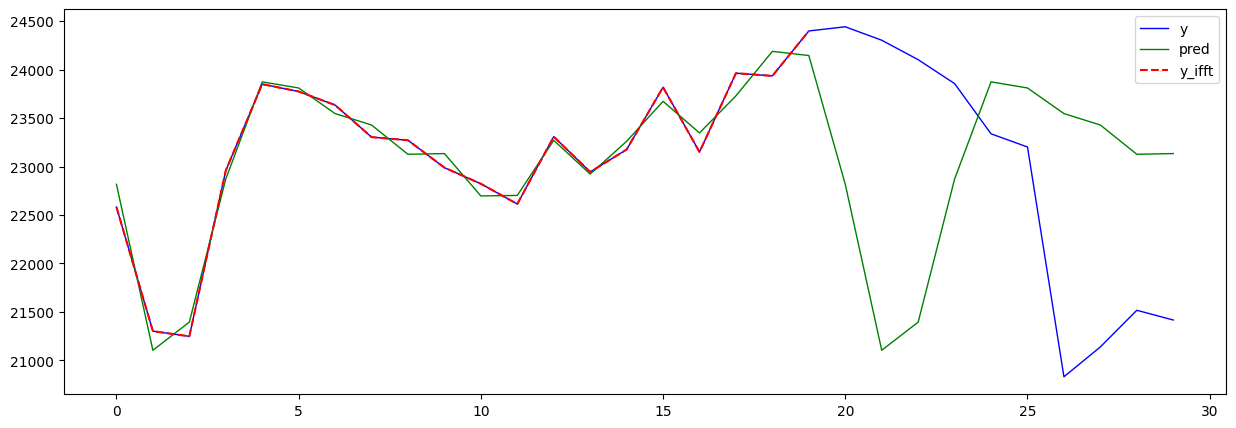

In [17]:
fr_3 = fr[0:3]
y_m_3 = y_m[0:3]
print("fr:", fr_3)
print("y_m:", y_m_3)

# Inverse FFT from freq domain to original time domain
from scipy import fftpack
from numpy import fft
#print("len y_fft:", type(y_fft), len(y_fft), (y_fft[0:10]))

t = np.arange(0, len(all_data))

#y_fft_cut = y_fft[0:99] #filter out a freq to see if it close match 
# try zero low amp freq (noise) -- didn't look just noise, no clear trend
treshold_amp = 16
y_fft_cut = np.zeros(y_fft.size, dtype=np.complex_)


fr = Fs/2 * np.linspace(0,1, int(take_days/1))

matchedf = 0
y_m = 2/take_days * abs(y_fft[0:np.size(fr)])
for i, f in enumerate(y_fft):
  
  if y_m[i] > treshold_amp: 
    y_fft_cut[i] = f
    matchedf += 1
print("len of matchedf:", matchedf, y_fft_cut[0:10])

inv = fftpack.ifft(y_fft_cut, n=len(data_last_points))

# calculate the new data points from the FFT result
n_harm = 8
x_freqdom = y_fft_cut #y_fft

f = fft.fftfreq(take_days)              # frequencies
indexes = list(range(take_days))
# sort indexes by frequency, lower -> higher
indexes.sort(key=lambda i: np.absolute(f[i]))

t2 = np.arange(0, take_days + predict_days)
res2 = np.zeros(t2.size)
for i in indexes[:1 + n_harm * 2]:
    ampli = np.absolute(x_freqdom[i]) / take_days   # amplitude
    phase = np.angle(x_freqdom[i])          # phase
    res2 += ampli * np.cos(2 * np.pi * f[i] * t2 + phase) 

plt.subplots(figsize=(15,5))
plt.plot(t, all_data, 'b', label = 'y', linewidth = 1)

plt.plot(np.arange(0, take_days + predict_days), res2, 'g', label = 'pred', linewidth = 1)

plt.plot(np.arange(0, inv.size), inv, 'r', label = 'y_ifft', linestyle="--")    # plot time series
plt.legend()
plt.show()

FFT does not feet for financial markers predictions!

*FFT extrapolation repeats timeseries with period N, where N - length of timeseries*

Try Locally Stationary Wavelet!

## Locally Stationary Wavelet (LSW) Model for Time Series Prediction


**What is a Locally Stationary Wavelet (LSW) Model?**

A *Locally Stationary Wavelet (LSW)* model is a time-series model designed for non-stationary signals, meaning their statistical properties (mean, variance, etc.) change over time.

- LSW models use wavelet decomposition to represent a time series as a sum of wavelet basis functions.
- Unlike Fourier-based methods (which assume global stationarity), LSW models capture local time-dependent structures.
- Used for time series forecasting, denoising, and trend detection.


**Mathematical Representation of LSW Models**

A discrete time series $ X_t $ can be represented in terms of a wavelet process:

$$
X_t = \sum_{j,k} w_j(k) \psi_{j,k}(t) \xi_{j,k}
$$

where:
- $ \psi_{j,k}(t) $ are discrete wavelet basis functions at scale $ j $ and time shift $ k $.
- $ w_j(k) $ are wavelet coefficients, controlling the influence of each wavelet.
- $ \xi_{j,k} \sim N(0,1) $ are uncorrelated white noise processes.

Each wavelet coefficient $ w_j(k) $ varies over time, allowing local stationarity.



**Locally Stationary Wavelet Spectrum**

LSW models use a time-dependent wavelet spectrum to describe the energy of a signal at different time points.

$$
S_j(t) = \sum_k w_j(k)^2 \psi_{j,k}(t)^2
$$

where:
- $ S_j(t) $ is the wavelet spectrum at scale $ j $.
- The sum runs over time shifts $ k $.

The total variance of the time series is then:

$$
\text{Var}(X_t) = \sum_j S_j(t)
$$

This allows us to track how variance changes across different time scales.



**Applying LSW to Time Series Prediction**

*Step 1: Wavelet Decomposition*

Perform Discrete Wavelet Transform (DWT) to decompose a time series into multiple frequency bands.

Using Maximal Overlap Discrete Wavelet Transform (MODWT), we obtain wavelet coefficients $ w_j(k) $ for different scales $ j $:

$$
X_t = \sum_{j,k} w_j(k) \psi_{j,k}(t)
$$

*Step 2: Estimate Time-Varying Spectrum*

Estimate the wavelet spectrum $ S_j(t) $ using wavelet periodograms:

$$
\hat{S}_j(t) = \frac{1}{N} \sum_k w_j(k)^2
$$

where $ N $ is the number of time points.

*Step 3: Forecast Future Values*

- Use historical wavelet coefficients $ w_j(k) $ to predict future values.
- Use autoregressive models (AR, ARIMA) or machine learning (LSTMs, SVR) on wavelet-transformed coefficients.
- Reconstruct the future time series by applying the Inverse Wavelet Transform (IWT).


**Advantages**

- Captures Non-Stationary Trends (Unlike ARIMA, which assumes stationarity).
- Multi-Resolution Analysis (Detects trends and high-frequency components).
- Flexible for Forecasting (Can integrate with machine learning models).
- Improves Signal Denoising (Useful for noisy time series).

In [ ]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

take_days = 50
predict_days = 25

y = np.array(data['Open'])
data_last_points = y[len(y) - take_days - predict_days: len(y) - predict_days: 1]
expected = y[len(y) - predict_days: len(y): 1]
all_data = np.concatenate((data_last_points, expected))

# apply wavelet decomposition:
wavelet = 'db4'  # Daubechies wavelet
coeffs = pywt.wavedec(data_last_points, wavelet, level=5) # discrete wavelet transformation of data

# extract approximation and detail coefficients
print(coeffs)
cA5, cD5, cD4, cD3, cD2, cD1 = coeffs
print(f'0:{len(cA5)} 1:{len(cD5)} 2:{len(cD4)} 3:{len(cD3)} 4:{len(cD2)} 5:{len(cD1)}')
 
# forecast future values
# use arima on wavelet coefficients
model = ARIMA(cA5, order=(2,1,2))
model_fit = model.fit()
forecast_ca5 = model_fit.forecast(steps=predict_days)

model = ARIMA(cD5, order=(2,1,2))
model_fit = model.fit()
forecast_cd5 = model_fit.forecast(steps=predict_days)

model = ARIMA(cD4, order=(2,1,2))
model_fit = model.fit()
forecast_cd4 = model_fit.forecast(steps=predict_days)

model = ARIMA(cD3, order=(2,1,2))
model_fit = model.fit()
forecast_cd3 = model_fit.forecast(steps=predict_days)

model = ARIMA(cD2, order=(2,1,2))
model_fit = model.fit()
forecast_cd2 = model_fit.forecast(steps=predict_days)

model = ARIMA(cD1, order=(2,1,2))
model_fit = model.fit()
forecast_cd1 = model_fit.forecast(steps=predict_days)


# inverse wavelet tranform (reconstruction)
coeffs[0] = np.append(cA5, forecast_ca5)  # append forecast to the approximation coefficients
coeffs[1] = np.append(cD5, forecast_cd5)
coeffs[2] = np.append(cD4, forecast_cd4) 
coeffs[3] = np.append(cD3, forecast_cd3) 
coeffs[4] = np.append(cD2, forecast_cd2) 
coeffs[5] = np.append(cD1, forecast_cd1) 
print(f'0:{len(coeffs[0])} 1:{len(coeffs[1])} 2:{len(coeffs[2])} 3:{len(coeffs[3])} 4:{len(coeffs[4])} 5:{len(coeffs[5])}')
print(coeffs)

X_pred = pywt.waverec([coeffs[0]] + coeffs[1:], wavelet)

# approx = pywt.upcoef('a', coeffs[-1], 'db4', level=5, take=take_days)
# model = ARIMA(approx, order=(5,1,0))
# model_fit = model.fit()
# X_pred = model_fit.forecast(steps=predict_days)

# plot
plt.figure(figsize=(12,6))
plt.plot(all_data, label="Original Time Series")
plt.plot(np.arange(take_days, take_days + predict_days), X_pred[-predict_days:], label="Forecast", linestyle="dashed")
plt.legend()
plt.show()



c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[array([151793.55091315, 153648.7278401 , 152160.38231633, 151496.00856239,
       159939.4888141 , 127713.79535557, 124708.28865359, 128968.05522925]), array([  225.99168408,  1152.62097711,  7338.06281271, -5733.70821075,
        3848.3713519 , -2748.23043339,  3849.73541805, -8646.21398255]), array([ 234.30192588, 1298.26250357, 7273.95857953, -265.03895816,
        765.88621401,  509.23880071, -522.78900433, -613.65203002,
        197.05350029]), array([-2.93334017e+03, -9.25512364e+03,  4.21165262e+03, -1.30584981e+03,
        1.50395077e+03, -4.39455810e-01, -2.33291442e+03,  2.80291211e+03,
        1.84681440e+03, -3.47545350e+03, -9.18449389e+02,  2.69216059e+03]), array([  200.33692604,   197.12040203, -2285.56526875,   947.91660994,
        1014.6151795 ,   399.72254693,  -411.55892631,  -276.35214484,
         249.40774129,  -870.69960155,  1244.80925705,   680.964547  ,
        -630.92350888,  -598.3455951 ,   333.0266117 ,   480.95892033,
         314.79787469]), array([  

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0:33 1:33 2:34 3:37 4:42 5:53
[array([151793.55091315, 153648.7278401 , 152160.38231633, 151496.00856239,
       159939.4888141 , 127713.79535557, 124708.28865359, 128968.05522925,
       120464.96460939, 119375.73346099, 128466.07716665, 121719.4325602 ,
       118782.03623598, 127771.57557635, 122884.21803214, 118449.88925343,
       126938.92375235, 123916.51796252, 118363.82128466, 126022.44199148,
       124784.61443011, 118498.91065068, 125073.91713277, 125468.02650377,
       118823.03449621, 124140.52899762, 125957.12987407, 119299.1839103 ,
       123263.23093043, 126252.32410207, 119887.73118909, 122475.60531551,
       126362.83866534]), array([  225.99168408,  1152.62097711,  7338.06281271, -5733.70821075,
        3848.3713519 , -2748.23043339,  3849.73541805, -8646.21398255,
        4851.97630726, -7331.92939197,  4438.16566639, -7201.5288261 ,
        4396.96398588, -7188.4011009 ,  4392.67210163, -7186.89016243,
        4392.03642551, -7186.52996466,  4391.76293347, -718

ValueError: coefficient shape mismatch

**Smoothing Time Series with Wavelets**

Smoothing a time series means removing short-term fluctuations (or noise) to reveal underlying trends, seasonality, or patterns in the data.

Reduce Noise: Real-world data is often noisy (due to measurement error, external factors).

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


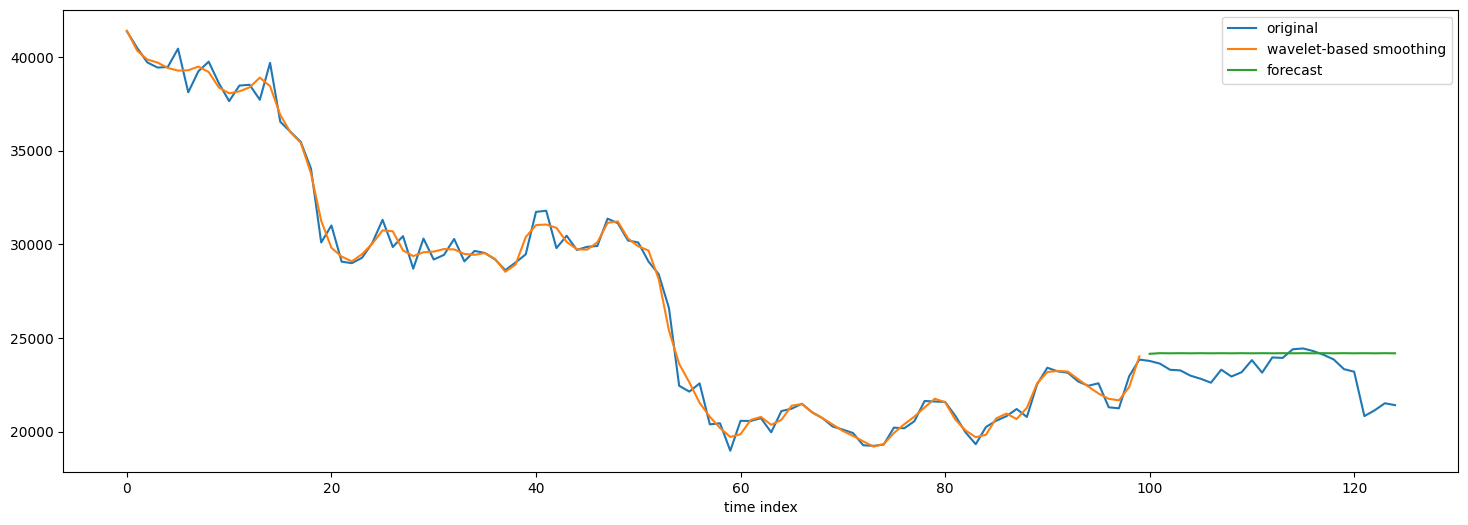

In [67]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

take_days = 100
predict_days = 25

y = np.array(data['Open'])
data_last_points = y[len(y) - take_days - predict_days: len(y) - predict_days: 1]
expected = y[len(y) - predict_days: len(y): 1]
all_data = np.concatenate((data_last_points, expected))

# perform wavelet decomposition
wavelet = 'db4'  # Daubechies wavelet
# wavelet = 'sym5'  
coeffs = pywt.wavedec(data_last_points, wavelet, mode='symmetric', level=3)

# for i in range(5):
#     coeffs[i+5] = np.zeros(coeffs[i+5].shape)

coeffs[-1] = np.zeros(coeffs[-1].shape)

# reconstruct wavelet
y_rec = pywt.waverec(coeffs, wavelet, mode='symmetric')


model = ARIMA(y_rec, order=(1,1,3))
model_fit = model.fit()

forecast = model_fit.forecast(steps=predict_days)

x = np.arange(take_days + predict_days)
x_rec = np.arange(take_days)
x_forecat = np.arange(take_days, take_days + predict_days)

plt.figure(figsize=(18,6))
plt.plot(x, all_data)
plt.plot(x_rec, y_rec)
plt.plot(x_forecat, forecast)
plt.legend(['original', 'wavelet-based smoothing', 'forecast'])
plt.xlabel('time index')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

take_days = 100
predict_days = 25

y = np.array(data['Open'])
data_last_points = y[len(y) - take_days - predict_days: len(y) - predict_days: 1]
expected = y[len(y) - predict_days: len(y): 1]
all_data = np.concatenate((data_last_points, expected))

# perform wavelet decomposition
wavelet = 'db4'  # Daubechies wavelet
# wavelet = 'sym5'  
coeffs = pywt.wavedec(data_last_points, wavelet, mode='symmetric', level=5)

ca5, cd1, cd2, cd3, cd4, cd5 = coeffs
omp0 = pywt.upcoef('a', ca5, wavelet=wavelet, level=5)[:take_days]
omp1 = pywt.upcoef('d', cd1, wavelet=wavelet, level=1)[:take_days]
omp2 = pywt.upcoef('d', cd2, wavelet=wavelet, level=2)[:take_days]
omp3 = pywt.upcoef('d', cd3, wavelet=wavelet, level=3)[:take_days]
omp4 = pywt.upcoef('d', cd4, wavelet=wavelet, level=4)[:take_days]
omp5 = pywt.upcoef('d', cd5, wavelet=wavelet, level=5)[:take_days]

approx = omp0 + omp5 + omp4 + omp3 + omp2 + omp1

x = np.arange(take_days + predict_days)
x_rec = np.arange(take_days)
# x_forecat = np.arange(take_days, take_days + predict_days)

plt.figure(figsize=(18,6))
plt.plot(x, all_data)
plt.plot(x_rec, approx)
# plt.plot(x_forecat, forecast)
plt.legend(['original', 'wavelet-based smoothing'])
plt.xlabel('time index')
plt.show()

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


ValueError: operands could not be broadcast together with shapes (100,) (66,) 

**Random Forest Approach**

Use past values (lags): create lag features (e.g. $t_1$, $t_2$, ..., $t_n$)

RMSE: 922.8874976109628
74


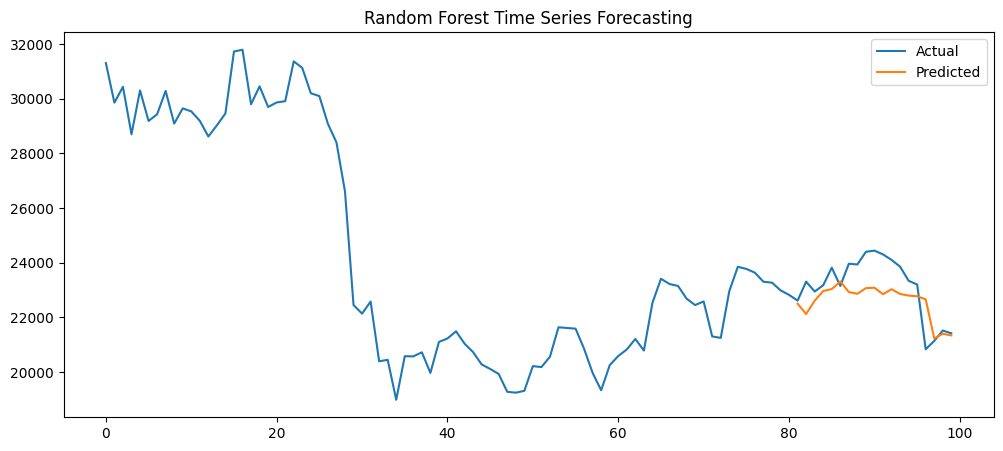

,value,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
7,30287.3,29433.0,29188.7,30305.9,28700.4,30437.5,29856.7,31308.3
8,29091.6,30287.3,29433.0,29188.7,30305.9,28700.4,30437.5,29856.7
9,29648.7,29091.6,30287.3,29433.0,29188.7,30305.9,28700.4,30437.5
10,29537.9,29648.7,29091.6,30287.3,29433.0,29188.7,30305.9,28700.4
11,29194.0,29537.9,29648.7,29091.6,30287.3,29433.0,29188.7,30305.9
...,...,...,...,...,...,...,...,...
95,23201.6,23337.7,23855.8,24102.6,24303.3,24442.1,24398.9,23935.3
96,20830.7,23201.6,23337.7,23855.8,24102.6,24303.3,24442.1,24398.9
97,21138.9,20830.7,23201.6,23337.7,23855.8,24102.6,24303.3,24442.1
98,21516.8,21138.9,20830.7,23201.6,23337.7,23855.8,24102.6,24303.3


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

take_days = 100
lag = 7

y = np.array(data['Open'])
data_last_points = y[len(y) - take_days: len(y): 1]
df = pd.DataFrame({'value': data_last_points})

# create lag features
def create_lags(df, lags=5):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['value'].shift(lag)
    return df.dropna()

df_lagged = create_lags(df.copy(), lags=lag)

# split data - predict last 20% based on 80%
train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged[:train_size], df_lagged[train_size:]

X_train = train.drop(columns='value')
y_train = train['value']
X_test = test.drop(columns='value')
y_test = test['value']

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print(train_size)

plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(data_last_points)), data_last_points, label='Actual')
plt.plot(np.arange(train_size + lag, train_size + len(X_test) + lag), y_pred, label='Predicted')
plt.legend()
plt.title('Random Forest Time Series Forecasting')
plt.show()

display(df_lagged)

**Random Forest + Wavelet Smoothing**

RMSE: 809.1698577006119
74


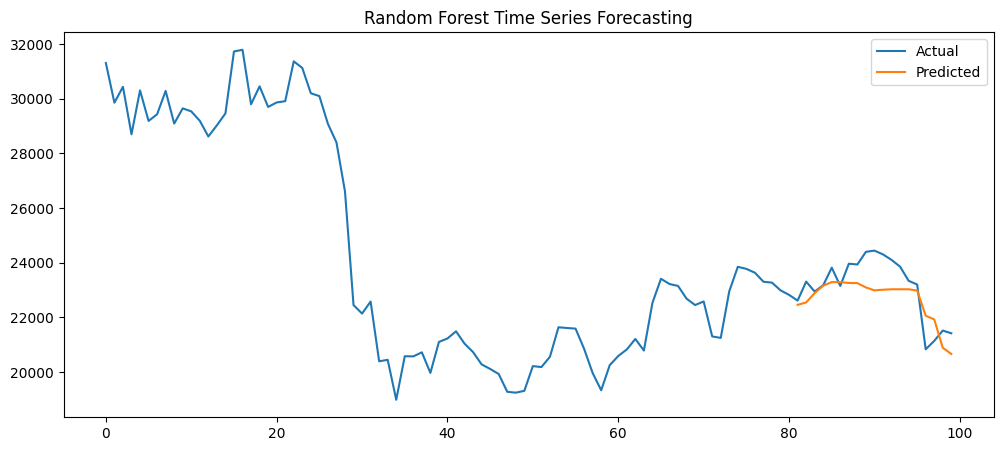

In [2]:
import pandas as pd
import numpy as np
import pywt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

take_days = 100
lag = 7

y = np.array(data['Open'])
data_last_points = y[len(y) - take_days: len(y): 1]

# perform wavelet decomposition
wavelet = 'db4'  # Daubechies wavelet
# wavelet = 'sym5'  
coeffs = pywt.wavedec(data_last_points, wavelet, mode='symmetric', level=3)
# for i in range(5):
#     coeffs[i+5] = np.zeros(coeffs[i+5].shape)
coeffs[-1] = np.zeros(coeffs[-1].shape)
# coeffs[-2] = np.zeros(coeffs[-2].shape)


# reconstruct wavelet
y_rec = pywt.waverec(coeffs, wavelet, mode='symmetric')

df = pd.DataFrame({'value': y_rec})

# create lag features
def create_lags(df, lags=5):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['value'].shift(lag)
    return df.dropna()

df_lagged = create_lags(df.copy(), lags=lag)

# split data - predict last 20% based on 80%
train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged[:train_size], df_lagged[train_size:]

X_train = train.drop(columns='value')
y_train = train['value']
X_test = test.drop(columns='value')
# y_test = test['value']
y_test = data_last_points[train_size + lag:]

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print(train_size)

plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(data_last_points)), data_last_points, label='Actual')
plt.plot(np.arange(train_size + lag, train_size + len(X_test) + lag), y_pred, label='Predicted')
plt.legend()
plt.title('Random Forest Time Series Forecasting')
plt.show()


Wow: smaller mse!

**Comparison of approaches:**

In [1]:
import pandas as pd
import numpy as np
import pywt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# create lag features
def create_lags(df, lags=5):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['value'].shift(lag)
    return df.dropna()

def random_forest_plain(data, point, take, lag=5):
    data_last_points = data[len(y) - take_days - point: len(y) - point: 1]
    df = pd.DataFrame({'value': data_last_points})
    df_lagged = create_lags(df.copy(), lags=lag)
    train_size = int(len(df_lagged) * 0.8)
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    X_train = train.drop(columns='value')
    y_train = train['value']
    X_test = test.drop(columns='value')
    y_test = test['value']

    # Train Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

def random_forest_smoothing(data, point, take, lag=5):
    data_last_points = data[len(y) - take_days - point: len(y) - point: 1]

    wavelet = 'db4'  # Daubechies wavelet
    coeffs = pywt.wavedec(data_last_points, wavelet, mode='symmetric', level=3)
    coeffs[-1] = np.zeros(coeffs[-1].shape)
    # reconstruct wavelet
    y_rec = pywt.waverec(coeffs, wavelet, mode='symmetric')

    df = pd.DataFrame({'value': y_rec})
    df_lagged = create_lags(df.copy(), lags=lag)
    train_size = int(len(df_lagged) * 0.8)
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    X_train = train.drop(columns='value')
    y_train = train['value']
    X_test = test.drop(columns='value')
    y_test = data_last_points[train_size + lag:]

    # Train Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

take_days = 100
y = np.array(data['Open'])
df_mse = pd.DataFrame(columns=["offset", "mse_rf_5", "mse_rf_7", "mse_rf_smooth_5", "mse_rf_smooth_7"])

for i in range(100):
    if i % 20 == 0:
        print(f'step {i}')
    point_offset = np.random.randint(0, 1050)
    df_mse.loc[i] = [point_offset, random_forest_plain(y, point_offset, 100, 5),
                     random_forest_plain(y, point_offset, 100, 7),
                     random_forest_smoothing(y, point_offset, 100, 5),
                     random_forest_smoothing(y, point_offset, 100, 7)]
    
display(df_mse.head(10))
print(f'mean values: {df_mse[["mse_rf_5", "mse_rf_7", "mse_rf_smooth_5", "mse_rf_smooth_7"]].mean()}')


step 0
step 20
step 40
step 60
step 80


,offset,mse_rf_5,mse_rf_7,mse_rf_smooth_5,mse_rf_smooth_7
0,995.0,621.096769,575.694684,832.468062,751.006014
1,1001.0,602.375112,618.192263,640.850905,672.622297
2,805.0,336.672132,350.744664,261.902201,285.780006
3,18.0,1993.705127,1993.395190,1933.778611,1861.037427
4,814.0,364.118034,373.560671,359.977357,308.931291
5,448.0,9238.869879,9798.928104,9181.770946,9517.418402
6,972.0,263.240996,279.227279,256.574074,268.561851
7,15.0,1664.555169,1780.074244,1130.898801,1113.995219
8,764.0,199.355400,166.652130,100.143102,130.338307
9,448.0,9238.869879,9798.928104,9181.770946,9517.418402


mean values: mse_rf_5           2433.796301
mse_rf_7           2515.500315
mse_rf_smooth_5    2269.453371
mse_rf_smooth_7    2336.705577
dtype: float64


Taking bigger lag does not reduce MSE, but smoothing via wavelets does!



**Evolutionary Algorithms + Fuzzy Logic**

range_of_change = [0.0, 2.0]

C:\Users\vmelnyk2\AppData\Local\Temp\ipykernel_27240\2784492803.py:10: RuntimeWarning: divide by zero encountered in divide
  return 1 - np.log(10/x - 1) / 10
C:\Users\vmelnyk2\AppData\Local\Temp\ipykernel_27240\2784492803.py:10: RuntimeWarning: divide by zero encountered in log
  return 1 - np.log(10/x - 1) / 10


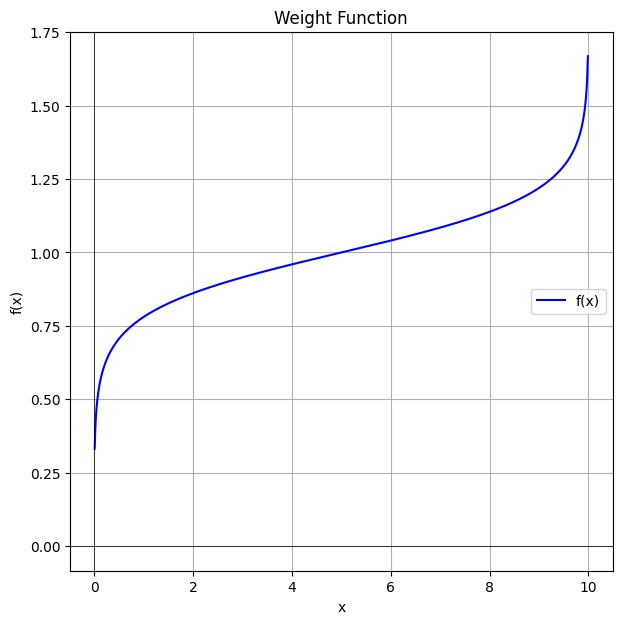

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy

def weight_function(x):
    return 10 / (1 + np.exp(- 10* (x - 1)))

def reverse_weight_f(x):
    return 1 - np.log(10/x - 1) / 10


x = np.linspace(0.0, 10.0, 800)  # 400 points for smooth plotting
y = reverse_weight_f(x)

plt.figure(figsize=(7, 7))
plt.plot(x, y, label="f(x)", color="blue")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Weight Function")
plt.axhline(0, color="black", linewidth=0.5)  # X-axis
plt.axvline(0, color="black", linewidth=0.5)  # Y-axis
plt.legend()
plt.grid(True)
plt.show()



In [6]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import json

from sklearn.metrics import mean_squared_error

lag = 5
lag_dicitonary = {0: "lag_0", 1: "lag_1", 2: "lag_2", 3: "lag_3", 4: "lag_4"}
lag_indices = {y.lower(): x for x, y in lag_dicitonary.items()}

lag_names = ["lag_0", "lag_1", "lag_2", "lag_3", "lag_4"]
predicator = ["or", "and"]
increase = ["decrease_high", "decrease", "const", "increase", "increase_high"]
increase_fallback = [*increase, "neutral"]

population_size = 100
rules_size = 9

def get_random_rule():
    return random.choice(lag_names) + " " + random.choice(increase) + " and " + random.choice(lag_names) + " " + random.choice(increase) + " then " + random.choice(increase)

initial_rule = "lag_0 const and lag_1 const and lag_2 const and lag_3 const and lag_4 const then const"
flrb_population = []

for i in range(population_size):
    fl_rb = []
    fl_rb.append(initial_rule)
    for j in range(rules_size):
        rule = get_random_rule()
        fl_rb.append(rule)
    flrb_population.append(fl_rb)

print(flrb_population[1])


rate_of_change = np.arange(-10, 10, 1)

antecedents = []
for i in range(len(lag_dicitonary)):
    ant = ctrl.Antecedent(rate_of_change, lag_dicitonary[i])

    ant['decrease_high'] = fuzz.trimf(rate_of_change, [-10, -6, -3])
    ant['decrease'] = fuzz.trimf(rate_of_change, [-6, -3, 0])
    ant['const'] = fuzz.trimf(rate_of_change, [-3, 0, 3])
    ant['increase'] = fuzz.trimf(rate_of_change, [0, 3, 6])
    ant['increase_high'] = fuzz.trimf(rate_of_change, [3, 6, 10])

    ant['neutral'] = fuzz.trimf(rate_of_change, [-10, 0, 10])  # very broad term for fallback

    antecedents.append(ctrl.Antecedent(rate_of_change, lag_dicitonary[i]))

output = ctrl.Consequent(rate_of_change, 'output')
for item in antecedents:
    item.automf(names=increase_fallback)

output['decrease_high'] = fuzz.trimf(rate_of_change, [-10, -6, -3])
output['decrease'] = fuzz.trimf(rate_of_change, [-6, -3, 0])
output['const'] = fuzz.trimf(rate_of_change, [-3, 0, 3])
output['increase'] = fuzz.trimf(rate_of_change, [0, 3, 6])
output['increase_high'] = fuzz.trimf(rate_of_change, [3, 6, 10])

def calculate_fuzzy(data_points, rulebase):
    rules = []
    for rule in rulebase:
        predicates = rule.lower().split(' ')
        ant_predicates = antecedents[lag_indices[predicates[0]]][predicates[1]]
        i = 2
        while i < len(predicates) - 2:
            if predicates[i] == 'or':
                ant_predicates = ant_predicates | antecedents[lag_indices[predicates[i+1]]][predicates[i+2]]
            else:
                ant_predicates = ant_predicates & antecedents[lag_indices[predicates[i+1]]][predicates[i+2]]
            i += 3
        rules.append(ctrl.Rule(ant_predicates, output[predicates[len(predicates) - 1]]))

    # Add fallback rule
    rule_default = ctrl.Rule(antecedents[0]['neutral'] | antecedents[1]['neutral'] | antecedents[2]['neutral'] | antecedents[3]['neutral'] | antecedents[4]['neutral'], output['const'])

    # control_system_ctrl = ctrl.ControlSystem([*existing_rules, rule_default])
    # Create the control system and simulation
    ctrl_system = ctrl.ControlSystem([*rules, rule_default])
    ctrl_sim = ctrl.ControlSystemSimulation(ctrl_system)
    output_vector = []

    # Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
    for data_point in data_points:
        # print(rulebase)
        # print(data_point)
        a = min(min(data_point), -max(data_point))
        b = max(max(data_point), -min(data_point))
        scaled = []
        for i in range(len(data_point)):
            scaled.append(-9 + ((data_point[i] - a)/ (b - a))*18)
        for i,point in enumerate(scaled):
            ctrl_sim.input[lag_dicitonary[i]] = point
        try:
            ctrl_sim.compute()
            output_point = ((ctrl_sim.output['output'] + 10)/ 20) * (b - a) + a
        except:
            output_point = 0.0
        output_vector.append(output_point)

    # output.view(sim=emotion_sim)
    return output_vector

def generate_new_population(progenitors, number_successors=90, mutation_rate=0.0):
    new_population = list(progenitors)
    for i in range(number_successors):
        prog = random.sample(range(0, len(progenitors)), 2)
        fl_rb = []
        for j in range(rules_size):
            if j != 0 and np.random.uniform(0, 1) < mutation_rate:
                rule = get_random_rule()
            else:
                rule = progenitors[random.choice(prog)][j]
            fl_rb.append(rule)
        new_population.append(fl_rb)

    return new_population


['lag_0 const and lag_1 const and lag_2 const and lag_3 const and lag_4 const then const', 'lag_1 decrease and lag_1 increase_high then increase', 'lag_2 decrease_high and lag_3 decrease then increase_high', 'lag_1 const and lag_2 increase then decrease_high', 'lag_1 decrease_high and lag_0 increase then decrease_high', 'lag_4 increase_high and lag_4 increase then const', 'lag_2 increase and lag_0 decrease then decrease_high', 'lag_3 increase and lag_1 decrease then const', 'lag_4 increase_high and lag_0 decrease then const', 'lag_2 decrease_high and lag_1 const then decrease_high']


In [ ]:
data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

take_days = 100
train_size = int(take_days * 0.8)
y = np.array(data['Open'])
data_last_points = y[len(y) - take_days - lag: len(y): 1]
mse_list = []

df = pd.DataFrame({'value': data_last_points})
for i in range(1, lag + 1):
    df[f'lag_{i - 1}'] = df['value'].shift(i-1) - df['value'].shift(i)

df = df.iloc[lag:].reset_index(drop=True)
# display(df.head(20))

df_train, df_test = df[:train_size], df[train_size - 1:]

data_last_points = data_last_points[lag:]
print(f'all data: {len(data_last_points)}, train data: {len(df_train)}, {train_size}')

steps = 100
mutation_steps = [10,11,20,21,30,31,40,41,50,51,60,61,70,71,80,81,90,91]
for i in range(steps):
    mse = []
    for rulebase in flrb_population:
        output_vector = calculate_fuzzy(df_train[lag_names].values, rulebase)
        lags_predicted = np.array(output_vector)
        lags_predicted = np.insert(lags_predicted, 0, 1) # insert 1 at the beginning
        lags_predicted = lags_predicted[:-1] # remove last element
        mse.append(mean_squared_error(df_train['lag_0'].values, lags_predicted))
    prog = []
    smallest_10_indices = sorted(range(len(mse)), key=lambda i: mse[i])[:10]
    for j in range(len(flrb_population)):
        if(j in smallest_10_indices):
            prog.append(flrb_population[j])
    
    if i in mutation_steps:
        new_population = generate_new_population(prog, mutation_rate=0.1)
    else:
        new_population = generate_new_population(prog, mutation_rate=0.0)
    if i % 5 == 0:
        print(f'step: {i}, mse: {sum(mse) / len(mse)}')
    mse_list.append(sum(mse) / len(mse))
    flrb_population = list(new_population)
    i += 1

min_mse = mse.index(min(mse))
flrb_min = flrb_population[min_mse]
print(f'minimal mse: {min(mse)}')
print(flrb_min)


with open("../resources/sets/outputs.json", "r") as f:
    data = json.load(f)

# Update only the specific field
data["timeseries"]["minimal-frlb"] = flrb_min

# Save it back without overwriting other parts
with open("../resources/sets/outputs.json", "w") as f:
    json.dump(data, f, indent=4)

y_test = df_test['value'].values[1:]
y_pred = []
output_vector = calculate_fuzzy(df_test[lag_names].values, flrb_min)
for i in range(take_days - train_size):
    y_pred.append( data_last_points[train_size + i - 1] + output_vector[i] )

print("y_test:", y_test[:10])
print("y_pred:", y_pred[:10])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
    
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(data_last_points)), data_last_points, label='Actual')
plt.plot(np.arange(train_size, train_size + len(y_pred)), y_pred, label='Predicted')
plt.legend()
plt.title('Genetic Algorithms based Fuzzy Logic Time Series Forecasting')
plt.show()


all data: 100, train data: 80, 80
step: 0, mse: 1155493.16559282
step: 5, mse: 767933.1453714218
step: 10, mse: 764065.3056382551
step: 15, mse: 760140.2929044873
step: 20, mse: 760140.2929044873
step: 25, mse: 689591.7499501131
step: 30, mse: 675986.721296145
step: 35, mse: 652359.9507359407
step: 40, mse: 652294.6828106198
step: 45, mse: 631284.7600823046
step: 50, mse: 631284.7600823046
step: 55, mse: 631284.7600823046
step: 60, mse: 631284.7600823046
step: 65, mse: 631284.7600823046
step: 70, mse: 631284.7600823046
step: 75, mse: 631284.7600823046
step: 80, mse: 631284.7600823046
step: 85, mse: 631284.7600823046
step: 90, mse: 631284.7600823046
step: 95, mse: 631284.7600823046
minimal mse: 631284.7600823053
['lag_0 const and lag_1 const and lag_2 const and lag_3 const and lag_4 const then const', 'lag_0 decrease_high and lag_4 increase then increase', 'lag_0 increase and lag_4 const then decrease', 'lag_1 increase_high and lag_3 decrease then increase_high', 'lag_0 increase and lag

KeyError: 'timeseries'

y_test: [22822.2 22613.3 23308.2 22944.2 23175.3 23818.1 23150.3 23963.3 23935.3
 24398.9]
y_pred: [23087.940000000002, 22611.431406674175, 22613.3, 23219.55217146187, 22944.2, 22978.861205426052, 23803.64787178135, 23258.254907488288, 23963.3, 23935.3]
RMSE: 653.3534845000307


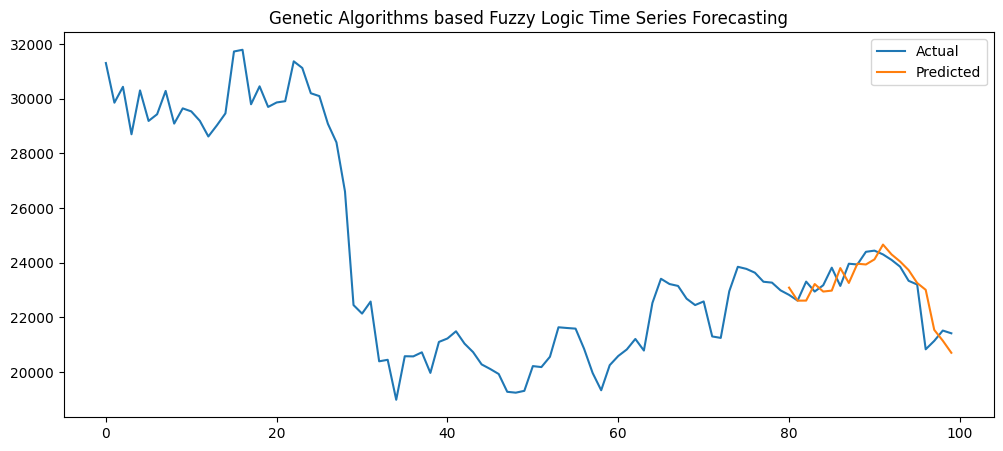

In [8]:
# with open("../resources/sets/outputs.json", "r") as f:
#     data = json.load(f)

# # Update only the specific field
# data["timeseries"]["minimal-frlb"] = flrb_min

# # Save it back without overwriting other parts
# with open("../resources/sets/outputs.json", "w") as f:
#     json.dump(data, f, indent=4)
import json

with open("../resources/sets/outputs.json", "r") as f:
    data = json.load(f)

flrb = data["timeseries"]["minimal-frlb"]

data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

take_days = 100
train_size = int(take_days * 0.8)
y = np.array(data['Open'])
data_last_points = y[len(y) - take_days - lag: len(y): 1]
mse_list = []

df = pd.DataFrame({'value': data_last_points})
for i in range(1, lag + 1):
    df[f'lag_{i - 1}'] = df['value'].shift(i-1) - df['value'].shift(i)

df = df.iloc[lag:].reset_index(drop=True)
# display(df.head(20))

df_train, df_test = df[:train_size], df[train_size - 1:]

data_last_points = data_last_points[lag:]
y_test = df_test['value'].values[1:]
y_pred = []
output_vector = calculate_fuzzy(df_test[lag_names].values, flrb)
for i in range(take_days - train_size):
    y_pred.append( data_last_points[train_size + i - 1] + output_vector[i] )

print("y_test:", y_test[:10])
print("y_pred:", y_pred[:10])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
    
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(data_last_points)), data_last_points, label='Actual')
plt.plot(np.arange(train_size, train_size + len(y_pred)), y_pred, label='Predicted')
plt.legend()
plt.title('Genetic Algorithms based Fuzzy Logic Time Series Forecasting')
plt.show()

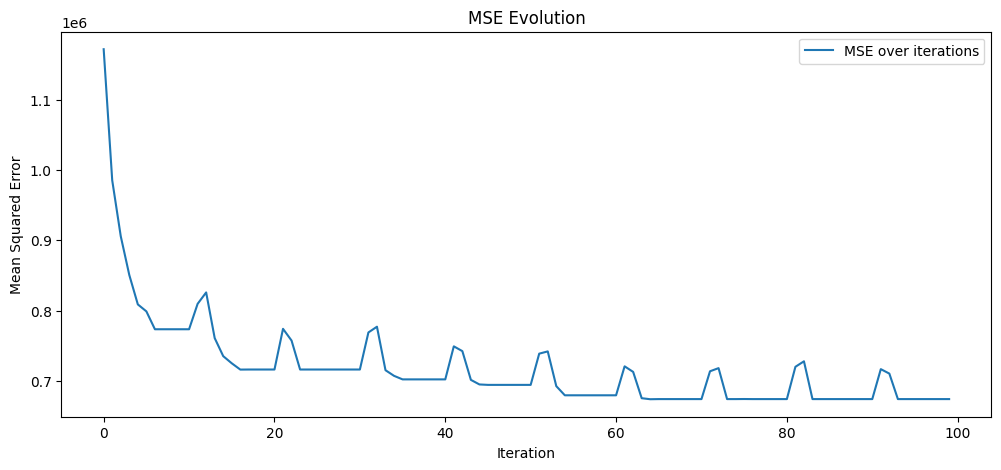

In [4]:
if mse_list:
    plt.figure(figsize=(12, 5))
    plt.plot(mse_list, label='MSE over iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE Evolution')
    plt.legend()
    plt.show()

In [34]:
l = [-3, -2, -1, 1]

print(max(max(l), -min(l)))
print(min(min(l), -max(l)))


3
-3


**NN - 3 layers, 5 input, 15 - hidden layer, 1 output**


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [50/1000], Loss: 33852232.0000
Epoch [100/1000], Loss: 14244789.0000
Epoch [150/1000], Loss: 18733232.0000
Epoch [200/1000], Loss: 45542580.0000
Epoch [250/1000], Loss: 22346040.0000
Epoch [300/1000], Loss: 3059614.5000
Epoch [350/1000], Loss: 27777488.0000
Epoch [400/1000], Loss: 33888308.0000
Epoch [450/1000], Loss: 35824032.0000
Epoch [500/1000], Loss: 20786372.0000
Epoch [550/1000], Loss: 25132070.0000
Epoch [600/1000], Loss: 44162644.0000
Epoch [650/1000], Loss: 23301214.0000
Epoch [700/1000], Loss: 34746032.0000
Epoch [750/1000], Loss: 38749624.0000
Epoch [800/1000], Loss: 34678276.0000
Epoch [850/1000], Loss: 31164632.0000
Epoch [900/1000], Loss: 36785532.0000
Epoch [950/1000], Loss: 34974380.0000
Epoch [1000/1000], Loss: 2747716.7500
RMSE: 896.765623310661


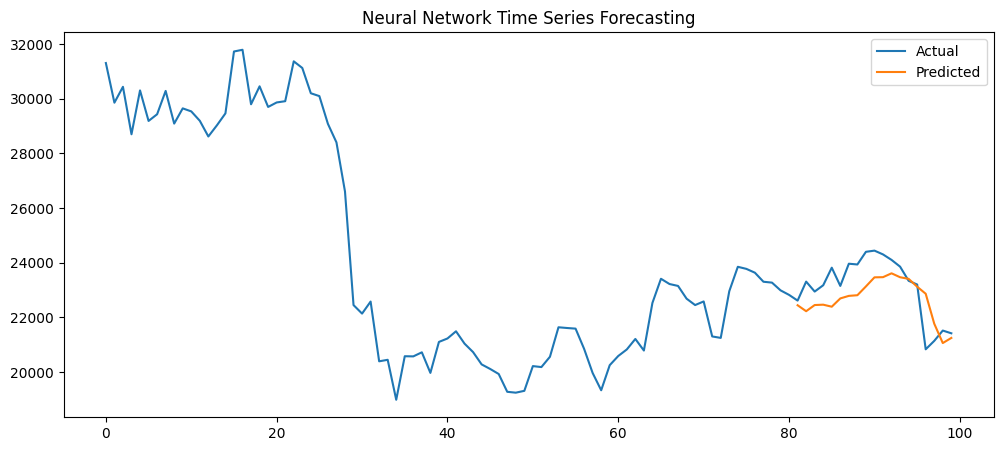

In [12]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(5, 15)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(15, 15)
        self.fc3 = nn.Linear(15, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x


data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')
take_days = 100
lag = 5

y = np.array(data['Open'])
data_last_points = y[len(y) - take_days: len(y): 1]
df = pd.DataFrame({'value': data_last_points})

def create_lags(df, lags=5):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['value'].shift(lag)
    return df.dropna()

df_lagged = create_lags(df.copy(), lags=lag)

train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged[:train_size], df_lagged[train_size:]

X_train = train.drop(columns='value')
y_train = train['value']
X_test = test.drop(columns='value')
y_test = test['value']

# X_numpy = np.random.randn(100, 5)  # 100 samples, 5 features
# y_numpy = np.random.randn(100, 1)  # 100 targets

X_tensor = torch.from_numpy(X_train.to_numpy()).float()
y_tensor = torch.from_numpy(y_train.to_numpy()).float()

# Step 2: Create DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=10, shuffle=True)

# Step 3: Initialize model, loss, optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    for batch_X, batch_y in loader:
        optimizer.zero_grad()
        output_nn = model(batch_X)
        loss = criterion(output_nn, batch_y)
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 5: Evaluation
model.eval()
with torch.no_grad():
    y_pred_tensor = model(torch.from_numpy(X_test.to_numpy()).float())
    y_pred = y_pred_tensor.numpy()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE:", rmse)

plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(data_last_points)), data_last_points, label='Actual')
plt.plot(np.arange(train_size + lag, train_size + len(X_test) + lag), y_pred, label='Predicted')
plt.legend()
plt.title('Neural Network Time Series Forecasting')
plt.show()

**What can we do next:**
1. Split timesries data to lsw, do (arima) rf on each component (may be first 2-3 components) then reconstruct -> remove noise ! -- done, does not provide sufficient improvement
2. Evolutionary algorithms for FLRB generation - done!
3. Use evolutionary algorithms to create portfolio -- TODO!
4. Take bigger Lag -> 7, 14, 21 -> RF  -- done, does not provide sufficient improvement
5. NN input 7, 14, 21 -- 5 seems to work the best

**Structure of student thesis**

1. Exploratory data analysis.
2. Arima and exponential smoothing. (we tried, but it did not give sufficient results)
3. Locally Stationary Wavelet (LSW) Model for Time Series Prediction. (smoothing)
4. Random Forest.
5. Combining approaches and comparison of approaches
6. Fuzzy timeseries forecasting with evolutionary algorithms for fuzzy logic rules construction.
7. Neural Networks.

TODO:

1. Diagram of MSE dropping 
2. Use evolutionary algorithms to create portfolio 

## All Compared:

In [16]:
import pandas as pd
import numpy as np
import pywt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(5, 15)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(15, 15)
        self.fc3 = nn.Linear(15, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# create lag features
def create_lags(df, lags=5):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['value'].shift(lag)
    return df.dropna()

def random_forest_plain(data, point, take, lag=5):
    data_last_points = data[len(y) - take_days - point: len(y) - point: 1]
    df = pd.DataFrame({'value': data_last_points})
    df_lagged = create_lags(df.copy(), lags=lag)
    train_size = int(len(df_lagged) * 0.8)
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    X_train = train.drop(columns='value')
    y_train = train['value']
    X_test = test.drop(columns='value')
    y_test = test['value']

    # Train Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

def random_forest_smoothing(data, point, take, lag=5):
    data_last_points = data[len(y) - take_days - point: len(y) - point: 1]

    wavelet = 'db4'  # Daubechies wavelet
    coeffs = pywt.wavedec(data_last_points, wavelet, mode='symmetric', level=3)
    coeffs[-1] = np.zeros(coeffs[-1].shape)
    # reconstruct wavelet
    y_rec = pywt.waverec(coeffs, wavelet, mode='symmetric')

    df = pd.DataFrame({'value': y_rec})
    df_lagged = create_lags(df.copy(), lags=lag)
    train_size = int(len(df_lagged) * 0.8)
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    X_train = train.drop(columns='value')
    y_train = train['value']
    X_test = test.drop(columns='value')
    y_test = data_last_points[train_size + lag:]

    # Train Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

lag_names = ["lag_0", "lag_1", "lag_2", "lag_3", "lag_4"]

def evolutionary_plain(data, point, take, lag=5):
    data_last_points = y[len(y) - take_days - point - lag: len(y) - point: 1]
    df = pd.DataFrame({'value': data_last_points})
    for i in range(1, lag + 1):
        df[f'lag_{i - 1}'] = df['value'].shift(i-1) - df['value'].shift(i)

    df = df.iloc[lag:].reset_index(drop=True)
    df_train, df_test = df[:train_size], df[train_size - 1:]
    data_last_points = data_last_points[lag:]

    y_test = df_test['value'].values[1:]
    y_pred = []

    with open("../resources/sets/outputs.json", "r") as f:
        data = json.load(f)

    flrb = data["timeseries"]["minimal-frlb"]
    output_vector = calculate_fuzzy(df_test[lag_names].values, flrb)
    for i in range(take_days - train_size):
        y_pred.append( data_last_points[train_size + i - 1] + output_vector[i] )
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

def nn_plain(data, point, take, lag=5):
    data_last_points = data[len(y) - take_days - point: len(y) - point: 1]
    df = pd.DataFrame({'value': data_last_points})
    df_lagged = create_lags(df.copy(), lags=lag)
    train_size = int(len(df_lagged) * 0.8)
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    X_train = train.drop(columns='value')
    y_train = train['value']
    X_test = test.drop(columns='value')
    y_test = test['value']
    X_tensor = torch.from_numpy(X_train.to_numpy()).float()
    y_tensor = torch.from_numpy(y_train.to_numpy()).float()

    # Step 2: Create DataLoader
    dataset = TensorDataset(X_tensor, y_tensor)
    loader = DataLoader(dataset, batch_size=10, shuffle=True)

    # Step 3: Initialize model, loss, optimizer
    model = SimpleNN()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Step 4: Training loop
    num_epochs = 1000

    for epoch in range(num_epochs):
        for batch_X, batch_y in loader:
            optimizer.zero_grad()
            output_nn = model(batch_X)
            loss = criterion(output_nn, batch_y)
            loss.backward()
            optimizer.step()

    # Step 5: Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_tensor = model(torch.from_numpy(X_test.to_numpy()).float())
        y_pred = y_pred_tensor.numpy()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

data = pd.read_csv('../resources/Top 100 Crypto Coins/bitcoin.csv')

take_days = 100
y = np.array(data['Open'])
df_mse = pd.DataFrame(columns=[
    "offset", "mse_rf_5", "mse_rf_7", "mse_rf_smooth_5", "mse_rf_smooth_7",
    "evolutionary_plain", "nn_plain"])

for i in range(20):
    if i % 5 == 0:
        print(f'step {i}')
    point_offset = np.random.randint(0, 1050)
    df_mse.loc[i] = [point_offset, 
                     random_forest_plain(y, point_offset, 100, 5),
                     random_forest_plain(y, point_offset, 100, 7),
                     random_forest_smoothing(y, point_offset, 100, 5),
                     random_forest_smoothing(y, point_offset, 100, 7),
                     evolutionary_plain(y, point_offset, 100, 5),
                     nn_plain(y, point_offset, 100, 5)]
    
display(df_mse.head(10))
print(f'mean values: {df_mse[["mse_rf_5", "mse_rf_7", "mse_rf_smooth_5", "mse_rf_smooth_7", "evolutionary_plain", "nn_plain"]].mean()}')


step 0


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead t

step 5


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead t

step 10


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead t

step 15


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead t

,offset,mse_rf_5,mse_rf_7,mse_rf_smooth_5,mse_rf_smooth_7,evolutionary_plain,nn_plain
0,688.0,288.053555,311.782750,360.006161,419.096445,189.501219,231.113869
1,250.0,3584.251123,3458.331173,3360.667633,3361.130481,2849.380761,2000.025983
2,388.0,2269.964001,2208.580845,1742.336247,1753.407123,1210.044028,3608.341654
3,266.0,2940.175959,2937.631632,2550.772672,2759.167789,2547.279942,3006.276102
4,468.0,2607.006874,2690.560321,1612.575711,1590.926931,2471.913276,2183.709709
5,671.0,178.705988,179.141293,151.988461,157.656796,162.574330,203.935837
6,389.0,2003.950153,2091.662500,1746.017157,1726.710876,1123.826723,3204.396782
7,367.0,5080.066051,6522.120460,5037.521562,6307.066822,1500.132969,2152.380853
8,788.0,282.428448,220.938251,189.699376,172.361957,238.282566,179.418780
9,564.0,2807.716632,2998.135446,2967.914130,3037.776660,2099.372178,2545.182965


mean values: mse_rf_5              1535.504734
mse_rf_7              1626.917025
mse_rf_smooth_5       1414.650529
mse_rf_smooth_7       1500.091472
evolutionary_plain    1031.785517
nn_plain              1352.903893
dtype: float64
